In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
sns.set(style ="white",color_codes=True)
sns.set(font_scale=1.5)
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
from statsmodels.formula.api import ols
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

In [3]:
BMW=pd.read_csv(r'C:\Users\manoj\Downloads\Simpli Learn for DS\DS_ML\Projects\BMW\train.csv')

In [4]:
BMW.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_target=BMW.y

In [6]:
y_target

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [7]:
x_features=BMW.drop(['ID','y'],axis=1)
x_features

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,h,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,e,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,u,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
BMW.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x_features,y_target,random_state=4)

In [10]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(3156, 376) (3156,) (1053, 376) (1053,)


In [11]:
BMW.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [12]:
x_train

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1221,y,aa,ai,c,d,ab,j,s,0,0,...,1,0,0,0,0,0,0,0,0,0
1017,ap,l,s,c,d,ag,j,n,0,0,...,0,0,0,0,0,0,0,0,0,0
1792,ak,s,as,c,d,ae,i,r,0,0,...,1,0,0,0,0,0,0,0,0,0
3314,n,l,ak,f,d,s,g,f,0,0,...,0,0,0,0,0,0,0,0,0,0
2822,ak,s,as,c,d,p,g,q,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,aj,l,as,f,d,v,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0
709,y,aa,as,g,d,af,j,f,0,0,...,1,0,0,0,0,0,0,0,0,0
2487,al,b,ai,c,d,n,j,w,0,0,...,0,0,1,0,0,0,0,0,0,0
174,d,aa,y,d,d,i,i,i,0,0,...,0,1,0,0,0,0,0,0,0,0


In [13]:
y_train

1221     88.34
1017    115.13
1792    110.01
3314     94.12
2822    109.21
         ...  
3671    104.85
709      85.82
2487     83.23
174     100.85
1146    104.92
Name: y, Length: 3156, dtype: float64

In [14]:
x_train.columns[9:]

Index(['X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=367)

In [15]:
np.unique(x_train[x_train.columns[9:]])

array([0, 1], dtype=int64)

In [16]:
x_train.isnull().sum()

X0      0
X1      0
X2      0
X3      0
X4      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 376, dtype: int64

In [17]:
x_train.isnull().sum().sum()

0

In [18]:
df_NAN=pd.DataFrame(data=x_train.isnull().sum(),columns=['count_of_nans'])

In [19]:
df_NAN[df_NAN.sum(axis=1)>0]

,count_of_nans


In [20]:
missing_columns=x_train.columns[x_train.isnull().any()]
missing_columns

Index([], dtype='object')

In [21]:
y_train.describe()

count    3156.000000
mean      100.686654
std        12.762407
min        72.110000
25%        90.840000
50%        99.210000
75%       109.012500
max       265.320000
Name: y, dtype: float64

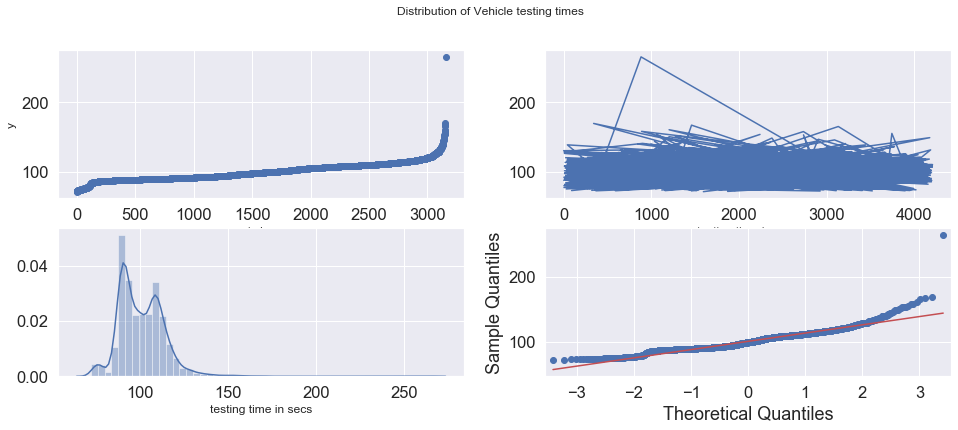

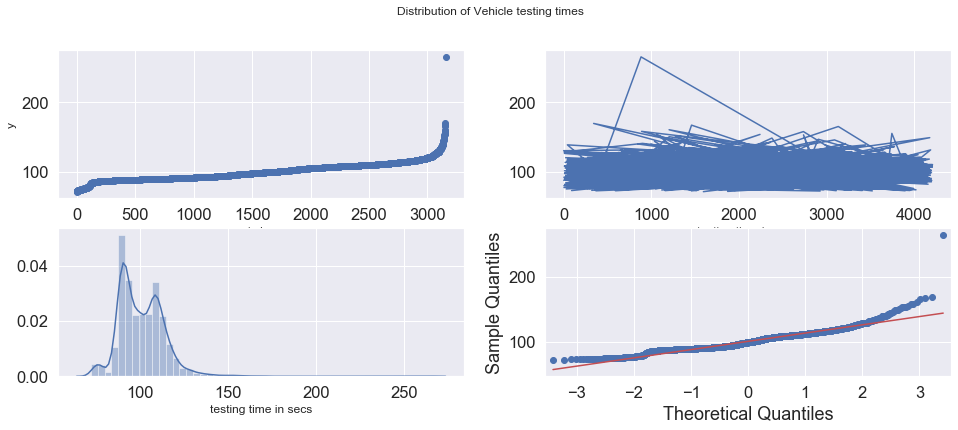

In [22]:
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(16,6))
fig.suptitle('Distribution of Vehicle testing times',fontsize=12)
ax1.scatter(range(x_train.shape[0]),np.sort(y_train.values))
ax1.set_xlabel('index',fontsize=12)
ax1.set_ylabel('y',fontsize=12)
ax2.plot(y_train);
ax2.set_xlabel('testing time in secs',fontsize=12)
sns.distplot(y_train.values,bins=50,kde=True,ax=ax3)
ax3.set_xlabel('testing time in secs',fontsize=12)
sm.qqplot((y_train),line='s',ax=ax4)

## Normality test
H0= sample is gaussian distribution
HA= sample is not normally distributed

In [23]:
stat, p = stats.shapiro(y_train)
print('statistics = {} , p= {}'.format(stat,p))

statistics = 0.9295496940612793 , p= 3.349798732507025e-36


In [24]:
alpha= 0.05
if p>alpha:
    print('sample is gaussian distribution and fail to reject Null')
else:
    print('sample is not normally distributed')

sample is not normally distributed


In [25]:
dtype_df=x_train.dtypes.reset_index()
dtype_df.head()

,index,0
0,X0,object
1,X1,object
2,X2,object
3,X3,object
4,X4,object


In [26]:
y_train.dtype

dtype('float64')

In [27]:
dtype_df.columns=['count','column type']

In [28]:
dtype_df

,count,column type
0,X0,object
1,X1,object
2,X2,object
3,X3,object
4,X4,object
...,...,...
371,X380,int64
372,X382,int64
373,X383,int64
374,X384,int64


In [29]:
dtype_df.groupby('column type').aggregate('count').reset_index()

,column type,count
0,int64,368
1,object,8


In [30]:
numerics=['int16','int32','int64','float16','float32','float64']
object=['O']

In [31]:
df_train_num=x_train.select_dtypes(include=numerics)
df_train_num.columns

Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=368)

In [32]:
df_train_cat=x_train.select_dtypes(include=object)
df_train_cat.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [33]:
 for cat_name in df_train_cat.columns:
        print('the unique values in the '+cat_name+' are {}'.format(df_train_cat[cat_name].nunique()))
        print(df_train_cat[cat_name].unique())
        

the unique values in the X0 are 46
['y' 'ap' 'ak' 'n' 'j' 'bc' 'ay' 'u' 'au' 'o' 't' 'x' 'aj' 's' 'k' 'az'
 'f' 'm' 'aq' 'v' 'h' 'z' 'i' 'w' 'e' 'as' 'ai' 'al' 'ax' 'd' 'ba' 'af'
 'ad' 'at' 'b' 'am' 'l' 'aw' 'a' 'c' 'r' 'aa' 'g' 'ao' 'q' 'ac']
the unique values in the X1 are 27
['aa' 'l' 's' 'f' 'y' 'i' 'b' 'a' 'v' 'r' 'o' 'u' 'h' 'e' 'k' 'c' 'm' 'z'
 'w' 'p' 'n' 'j' 't' 'ab' 'g' 'q' 'd']
the unique values in the X2 are 42
['ai' 's' 'as' 'ak' 'ac' 'n' 'f' 'aq' 'm' 'ae' 'at' 'r' 'c' 't' 'b' 'e'
 'x' 'ao' 'aw' 'a' 'ay' 'ah' 'd' 'k' 'ag' 'z' 'ar' 'i' 'an' 'al' 'am' 'p'
 'g' 'q' 'y' 'h' 'au' 'ap' 'o' 'aa' 'av' 'j']
the unique values in the X3 are 7
['c' 'f' 'd' 'g' 'a' 'e' 'b']
the unique values in the X4 are 3
['d' 'a' 'c']
the unique values in the X5 are 29
['ab' 'ag' 'ae' 's' 'p' 'n' 'ac' 'm' 'ad' 'r' 'af' 'w' 'c' 'v' 'k' 'i'
 'ah' 'l' 'd' 'q' 'j' 'aa' 'f' 'x' 'o' 'g' 'h' 'y' 'u']
the unique values in the X6 are 12
['j' 'i' 'g' 'l' 'k' 'f' 'd' 'b' 'h' 'a' 'e' 'c']
the unique values in t

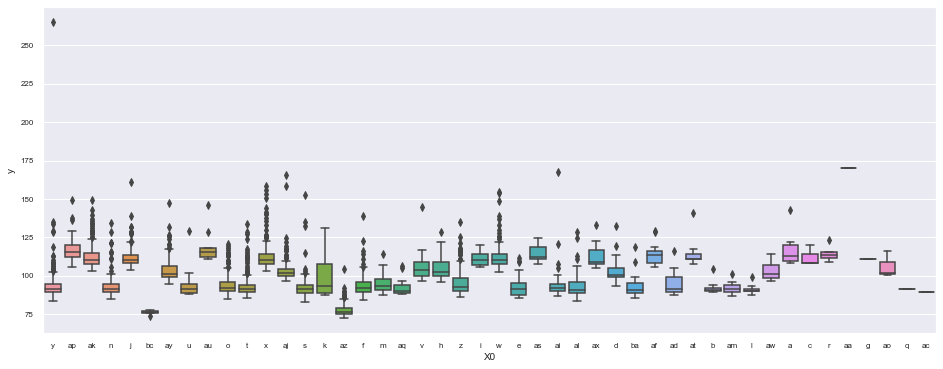

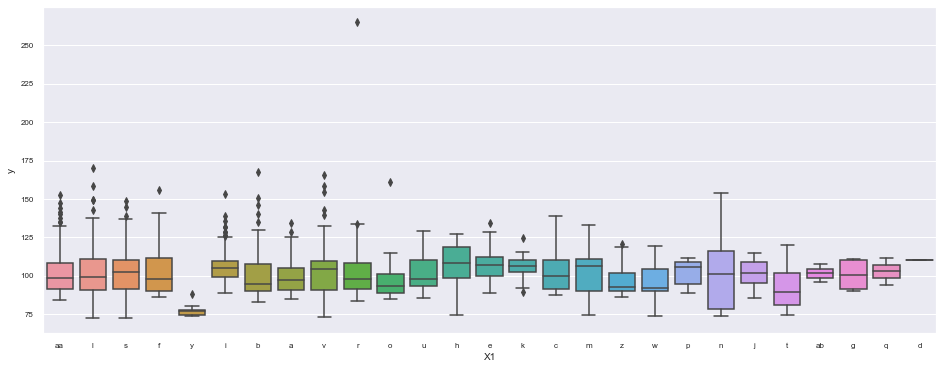

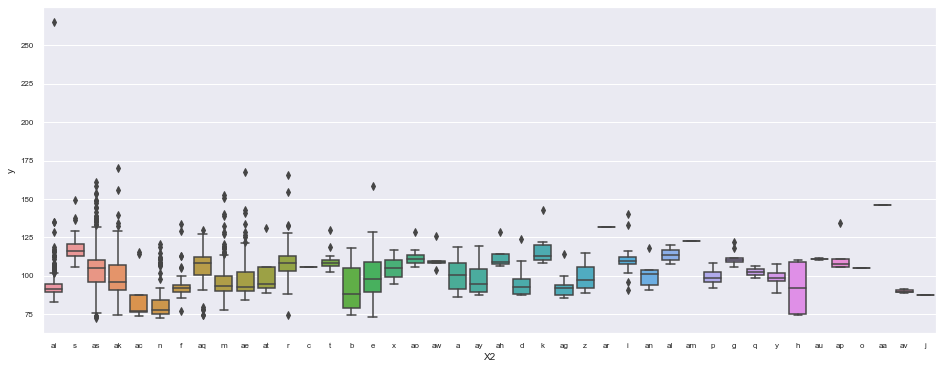

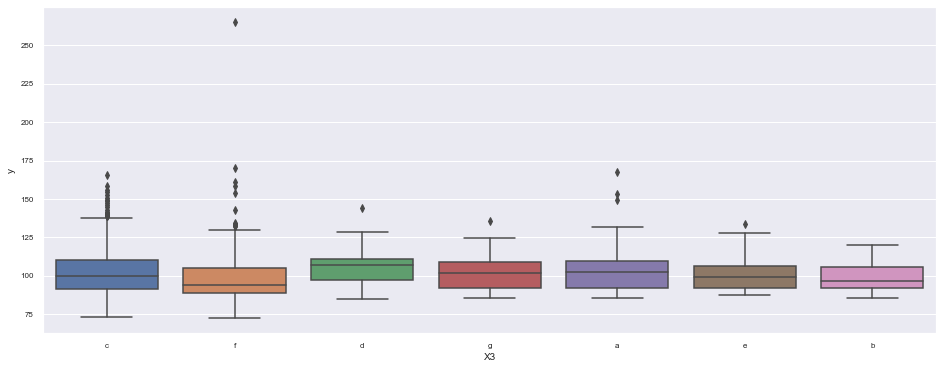

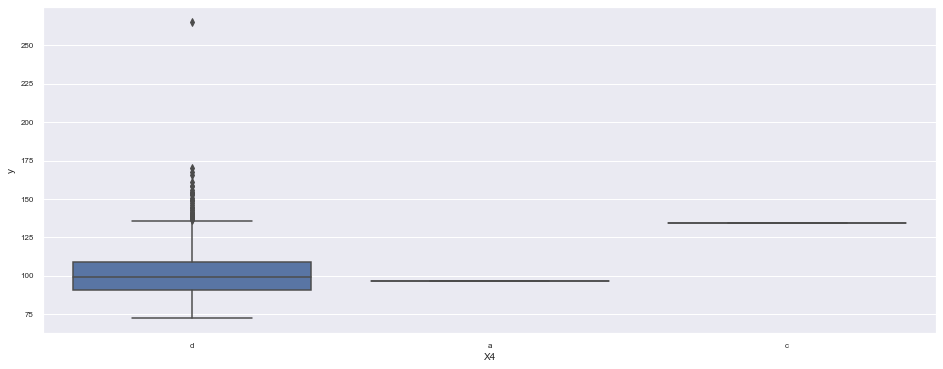

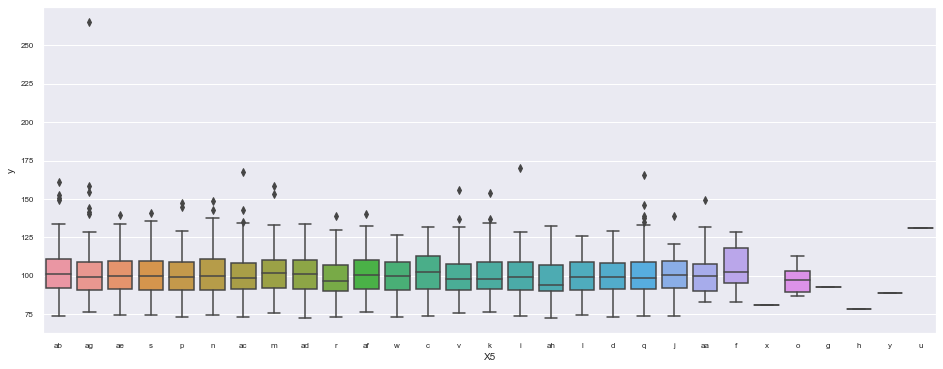

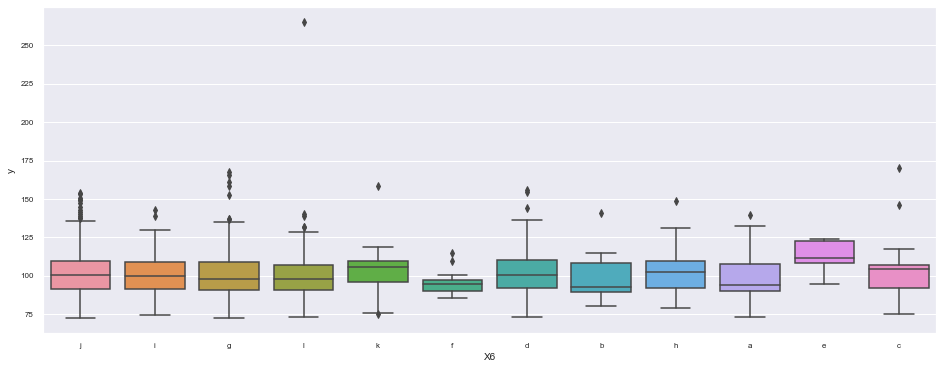

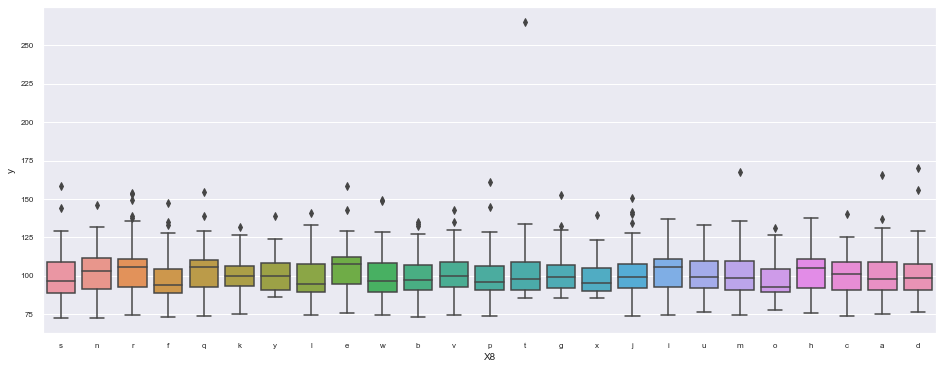

In [34]:
cols=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
for col in cols:
    plt.figure(figsize=(16,6))
    
    sns.boxplot(x=col, y=y_train, data=x_train)
    plt.xlabel(col,fontsize=10)
    plt.ylabel('y',fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

In [35]:
model = ols('y_train ~ C(X5)',data = x_train).fit()

In [36]:
print('F- Statistic = {}'.format(model.fvalue))
print('P-Value = {}'.format(model.f_pvalue))

F- Statistic = 1.5684944922626374
P-Value = 0.029122511404681084


In [37]:
anova_table=sm.stats.anova_lm(model,typ=2)
anova_table
## H0 P>0.05 means are same 
## HA p<0.05 and there is significent different among treatments

,sum_sq,df,F,PR(>F)
C(X5),7117.386970,28.0,1.568494,0.029123
Residual,506765.954896,3127.0,NaN,NaN


In [38]:
x_train.X4.unique()

array(['d', 'a', 'c'], dtype=object)

In [39]:
## Multi comparision of means of the column
colname='X4'
m_comp=pairwise_tukeyhsd(endog=y_train,groups=x_train[colname],alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     a      c    37.35 0.0961  -4.9382 79.6382  False
     a      d   3.9873    0.9 -25.9196 33.8943  False
     c      d -33.3627 0.0243 -63.2696 -3.4557   True
-----------------------------------------------------


In [40]:
colnames=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
for col in colnames:
    model=ols('y_train ~ ' +col,data = x_train).fit()
    print('column : {} , F-Statistic : {} , p-value = {}'.format(col,model.fvalue,model.f_pvalue))

column : X0 , F-Statistic : 94.46844642167895 , p-value = 0.0
column : X1 , F-Statistic : 5.37902012936003 , p-value = 4.1633446001657084e-17
column : X2 , F-Statistic : 23.350657493233932 , p-value = 1.1515029058522026e-149
column : X3 , F-Statistic : 20.458752037075726 , p-value = 1.2816422026229934e-23
column : X4 , F-Statistic : 3.470242971131888 , p-value = 0.031228343186028917
column : X5 , F-Statistic : 1.5684944922626374 , p-value = 0.029122511404681084
column : X6 , F-Statistic : 3.274964811100064 , p-value = 0.00017780038470014724
column : X8 , F-Statistic : 4.296986281233256 , p-value = 1.467199985878419e-11


In [41]:
dtype_df[dtype_df['column type']=='int64']

,count,column type
8,X10,int64
9,X11,int64
10,X12,int64
11,X13,int64
12,X14,int64
...,...,...
371,X380,int64
372,X382,int64
373,X383,int64
374,X384,int64


# Outiner detection

In [42]:
y_train.describe()

count    3156.000000
mean      100.686654
std        12.762407
min        72.110000
25%        90.840000
50%        99.210000
75%       109.012500
max       265.320000
Name: y, dtype: float64

In [43]:
Q1=np.percentile(y_train,25)
Q2=np.percentile(y_train,50)
Q3=np.percentile(y_train,75)
step=(Q3-Q1)*3
print('Q1 ={} , Q2 = {} , Q3= {}, Outliner step value= {}'.format(Q1,Q2,Q3,step))

Q1 =90.84 , Q2 = 99.21000000000001 , Q3= 109.0125, Outliner step value= 54.5175


In [44]:
outliner_lower_idx=y_train[y_train<=(Q1-step)].index
outliner_lower_idx

Int64Index([], dtype='int64')

In [45]:
outliner_upper_idx=y_train[y_train>(Q3+step)].index
outliner_upper_idx

Int64Index([342, 3133, 883, 1459], dtype='int64')

In [46]:
no_lower_outliners=len(outliner_lower_idx)
no_upper_outliner=len(outliner_upper_idx)
print('Number of outliners on the lower extreme side ={}'. format(len(outliner_lower_idx)))
print('Number of outliners on the upper extreme side ={}'. format(len(outliner_upper_idx)))

Number of outliners on the lower extreme side =0
Number of outliners on the upper extreme side =4


In [47]:
print('lower outliners = {}%'.format(no_lower_outliners/y_train.shape[0]*100))
print('upper outliners = {}%'.format(no_upper_outliner/y_train.shape[0]*100))

lower outliners = 0.0%
upper outliners = 0.12674271229404308%


In [48]:
y_train.loc[outliner_upper_idx].sort_values(ascending=False)


883     265.32
342     169.91
1459    167.45
3133    165.52
Name: y, dtype: float64

# Label Encoder
## Categorical to Numerical 

In [49]:
x_train.index

Int64Index([1221, 1017, 1792, 3314, 2822, 2393, 1472, 2625, 2881, 1536,
            ...
             946, 2871, 3678, 1082,  456, 3671,  709, 2487,  174, 1146],
           dtype='int64', length=3156)

In [50]:
label_encoder = preprocessing.LabelEncoder()
x_train=x_train.apply(label_encoder.fit_transform)
x_test=x_test.apply(label_encoder.fit_transform)

In [51]:
x_test

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
4108,31,13,11,5,2,0,9,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1800,31,13,11,5,2,4,9,16,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,11,12,29,0,2,22,9,2,0,0,...,0,0,1,0,0,0,0,0,0,0
1651,31,0,6,5,2,3,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2602,37,0,11,4,2,14,9,11,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,18,19,28,5,2,20,9,6,0,0,...,0,0,0,0,0,0,0,0,0,0
3251,36,3,25,0,2,20,6,22,0,0,...,0,0,1,0,0,0,0,0,0,0
1131,27,1,8,0,2,1,0,12,0,0,...,0,1,0,0,0,0,0,0,0,0
3769,31,13,11,5,2,21,11,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
x_train

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1221,44,1,6,2,2,1,9,18,0,0,...,1,0,0,0,0,0,0,0,0,0
1017,11,13,37,2,2,6,9,13,0,0,...,0,0,0,0,0,0,0,0,0,0
1792,7,20,15,2,2,4,8,17,0,0,...,1,0,0,0,0,0,0,0,0,0
3314,34,13,7,5,2,23,6,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2822,7,20,15,2,2,20,6,16,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,6,13,15,5,2,25,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
709,44,1,15,6,2,5,9,5,0,0,...,1,0,0,0,0,0,0,0,0,0
2487,8,3,6,2,2,18,9,22,0,0,...,0,0,1,0,0,0,0,0,0,0
174,24,1,40,3,2,13,8,8,0,0,...,0,1,0,0,0,0,0,0,0,0


# Linear regression

In [87]:
linrig=LinearRegression()

In [88]:
%%time
linrig.fit(x_train,y_train)


Wall time: 4.45 s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
y_pred=linrig.predict(x_train)
print("\nTraining Score")
print('Mean squared error : {}'.format(mean_squared_error(y_train,y_pred)))
print('R2 score : {}'.format(r2_score(y_train,y_pred)))

y_pred=linrig.predict(x_test)
print("\nTesting Score")
print('Mean squared error : {}'.format(mean_squared_error(y_test,y_pred)))
print('R2 score : {}'.format(r2_score(y_test,y_pred)))


Training Score
Mean squared error : 64.97586538786153
R2 score : 0.6009525616856839

Testing Score
Mean squared error : 2.7079824692617285e+20
R2 score : -1.753486592435372e+18


## Random Forest

In [56]:
rf_reg=RandomForestRegressor(criterion='mse',max_depth=4,max_features='auto',min_samples_split=0.05,n_estimators=20)

In [57]:
rf_reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.05, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [58]:
%%time 
y_pred=rf_reg.predict(x_train)
print("\nTraining Score")
print('Mean squared error : {}'.format(mean_squared_error(y_train,y_pred)))
print('R2 score : {}'.format(r2_score(y_train,y_pred)))

y_pred=rf_reg.predict(x_test)
print("\nTesting Score")
print('Mean squared error : {}'.format(mean_squared_error(y_test,y_pred)))
print('R2 score : {}'.format(r2_score(y_test,y_pred)))


Training Score
Mean squared error : 68.17666638588759
R2 score : 0.5812949329462778

Testing Score
Mean squared error : 72.70926205712193
R2 score : 0.5291892853435205
Wall time: 100 ms


## KNN Regression

In [59]:
from sklearn.neighbors import KNeighborsRegressor

In [60]:
knn= KNeighborsRegressor(n_neighbors=17,metric='hamming',weights='uniform',algorithm='brute')

In [61]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='hamming',
                    metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                    weights='uniform')

In [62]:
%%time 
y_pred=knn.predict(x_train)
print("\nTraining Score")
print('Mean squared error : {}'.format(mean_squared_error(y_train,y_pred)))
print('R2 score : {}'.format(r2_score(y_train,y_pred)))

y_pred=knn.predict(x_test)
print("\nTesting Score")
print('Mean squared error : {}'.format(mean_squared_error(y_test,y_pred)))
print('R2 score : {}'.format(r2_score(y_test,y_pred)))


Training Score
Mean squared error : 78.111419482745
R2 score : 0.5202809279781071

Testing Score
Mean squared error : 86.16463122631993
R2 score : 0.4420623940055227
Wall time: 21 s


## Gradient Boosting Regressor

In [63]:
gbr= GradientBoostingRegressor(n_estimators=600,max_depth=8, min_samples_split=.1, max_features='sqrt',learning_rate=0.01,loss='ls')

In [64]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=0.1,
                          min_weight_fraction_leaf=0.0, n_estimators=600,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [65]:
%%time 
y_pred=gbr.predict(x_train)
print("\nTraining Score")
print('mean abs error          : {}'.format(metrics.mean_absolute_error(y_train,y_pred)))
print('Mean squared error      : {}'.format(metrics.mean_squared_error(y_train,y_pred)))
print('root mean sq error RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_train,y_pred))))
print('R2 score                : {}'.format(r2_score(y_train,y_pred)))


y_pred=gbr.predict(x_test)
print("\nTesting Score")
print('mean abs error          : {}'.format(metrics.mean_absolute_error(y_test,y_pred)))
print('Mean squared error      : {}'.format(metrics.mean_squared_error(y_test,y_pred)))
print('root mean sq error RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
print('R2 score                : {}'.format(r2_score(y_test,y_pred)))


Training Score
mean abs error          : 4.8565335481729965
Mean squared error      : 61.135221611727964
root mean sq error RMSE : 7.818901560432128
R2 score                : 0.6245397667378267

Testing Score
mean abs error          : 7.660083304896607
Mean squared error      : 85.88152837708446
root mean sq error RMSE : 9.267228732317147
R2 score                : 0.4438955559851495
Wall time: 319 ms


## XGboost Regression model

In [66]:
import xgboost as xgb

In [67]:
dtrain=xgb.DMatrix(x_train,label=y_train)
dtest=xgb.DMatrix(x_test,label=y_test)

In [68]:
mean_train=y_train.mean()

In [69]:
baseline_predictions=np.ones(y_test.shape)*mean_train

In [70]:
mae_baseline=metrics.mean_absolute_error(y_test,baseline_predictions)

In [71]:
print('Baseline MAE is : {}'.format(mae_baseline))

Baseline MAE is : 10.035775784559059


In [72]:
xgb_params={'max_depth':8,'min_child_weight':1,'eta':.35,'subsample':1,'colsample_bytree':.9,
            'objective':'reg:squarederror','evav_metric':'mae','validate_parameters':1,
            'reg_alpha':10,'reg_lambda':45,
           'verbose_eval':False}

In [73]:
%%time
model=xgb.train(xgb_params,dtrain,
               num_boost_round=999,evals=[(dtest,"Test")],
               early_stopping_rounds=10)

[0]	Test-rmse:66.7137
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:44.6457
[2]	Test-rmse:30.2956
[3]	Test-rmse:21.1309
[4]	Test-rmse:15.3906
[5]	Test-rmse:12.0104
[6]	Test-rmse:10.1859
[7]	Test-rmse:9.21255
[8]	Test-rmse:8.71424
[9]	Test-rmse:8.47183
[10]	Test-rmse:8.35552
[11]	Test-rmse:8.2774
[12]	Test-rmse:8.28087
[13]	Test-rmse:8.27119
[14]	Test-rmse:8.25952
[15]	Test-rmse:8.26004
[16]	Test-rmse:8.26996
[17]	Test-rmse:8.2835
[18]	Test-rmse:8.28286
[19]	Test-rmse:8.2999
[20]	Test-rmse:8.3007
[21]	Test-rmse:8.31832
[22]	Test-rmse:8.31804
[23]	Test-rmse:8.32445
[24]	Test-rmse:8.33562
Stopping. Best iteration:
[14]	Test-rmse:8.25952

Wall time: 910 ms


In [78]:
%%time 
y_pred=model.predict(dtrain)
print("\nTraining Score")
print('mean abs error          : {}'.format(metrics.mean_absolute_error(y_train,y_pred)))
print('Mean squared error      : {}'.format(metrics.mean_squared_error(y_train,y_pred)))
print('root mean sq error RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_train,y_pred))))
print('R2 score                : {}'.format(r2_score(y_train,y_pred)))


y_pred=model.predict(dtest)
print("\nTesting Score")
print('mean abs error          : {}'.format(metrics.mean_absolute_error(y_test,y_pred)))
print('Mean squared error      : {}'.format(metrics.mean_squared_error(y_test,y_pred)))
print('root mean sq error RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
print('R2 score                : {}'.format(r2_score(y_test,y_pred)))




Training Score
mean abs error          : 4.282243514550503
Mean squared error      : 50.70224431815009
root mean sq error RMSE : 7.120550843730427
R2 score                : 0.6886136015092745

Testing Score
mean abs error          : 5.653414898443992
Mean squared error      : 69.48256361617298
root mean sq error RMSE : 8.335620169859768
R2 score                : 0.5500829673309767


AttributeError: 'Booster' object has no attribute 'score'

In [86]:
accuracy = accuracy_score(y_test, y_pred)

ValueError: continuous is not supported

In [4]:
import pandas as pd
pd_series = pd.Series(3,index=['a','b','c'])

In [5]:
pd_series

a    3
b    3
c    3
dtype: int64

In [9]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [15]:
import numpy as np
np.lispace(5,15,10)

AttributeError: module 'numpy' has no attribute 'lispace'